In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:

data = pd.read_csv('ADM.L.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3877,04/02/2020,2266.0,2302.0,2266.0,2280.0,2280.0,436720
3878,05/02/2020,2264.0,2296.0,2264.0,2287.0,2287.0,978362
3879,06/02/2020,2304.0,2308.0,2275.0,2275.0,2275.0,415539
3880,07/02/2020,2315.0,2320.0,2246.0,2270.0,2270.0,841576
3881,10/02/2020,2261.0,2296.0,2257.0,2296.0,2296.0,909984


In [18]:
data_training = data[:2730]
data_test = data[2730:]

In [19]:

data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [20]:

scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.00000000e+00, 1.01044123e-03, 9.90825688e-02, 0.00000000e+00,
        1.00000000e+00],
       [1.02354145e-03, 1.01044123e-03, 1.06116208e-01, 3.40831629e-04,
        9.04643959e-02],
       [1.36472194e-03, 0.00000000e+00, 1.05155959e-01, 0.00000000e+00,
        5.44412685e-02],
       ...,
       [8.12350734e-01, 8.05995285e-01, 8.33027523e-01, 8.12542604e-01,
        1.08296356e-02],
       [8.15080177e-01, 8.10710677e-01, 8.36085627e-01, 8.17314247e-01,
        7.81821553e-03],
       [8.15762538e-01, 8.05321657e-01, 8.27522936e-01, 8.07089298e-01,
        9.18977854e-03]])

In [21]:
data_training[0:10]

array([[0.00000000e+00, 1.01044123e-03, 9.90825688e-02, 0.00000000e+00,
        1.00000000e+00],
       [1.02354145e-03, 1.01044123e-03, 1.06116208e-01, 3.40831629e-04,
        9.04643959e-02],
       [1.36472194e-03, 0.00000000e+00, 1.05155959e-01, 0.00000000e+00,
        5.44412685e-02],
       [3.41180484e-04, 9.29609296e-04, 1.06422018e-01, 1.19291070e-03,
        9.33047810e-02],
       [1.02354145e-03, 1.40113641e-03, 1.07033639e-01, 1.02249489e-03,
        5.80113155e-02],
       [1.02354145e-03, 8.82450657e-04, 1.06727829e-01, 6.81663258e-04,
        6.21803899e-02],
       [1.02354145e-03, 2.02088245e-03, 1.06495410e-01, 2.72665303e-03,
        2.89938834e-02],
       [4.09416581e-03, 4.37857865e-03, 1.08868502e-01, 5.45330607e-03,
        1.66602557e-02],
       [6.14124872e-03, 4.71539239e-03, 1.09480122e-01, 4.77164281e-03,
        1.03910069e-02],
       [3.75298533e-03, 3.36813742e-03, 1.08868502e-01, 4.08997955e-03,
        1.73932879e-02]])

In [22]:

X_train = []
y_train = []

In [23]:
for i in range(30, data_training.shape[0]):
    X_train.append(data_training[i-30:i])
    y_train.append(data_training[i, 0])

In [24]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:

X_train.shape

(2700, 30, 5)

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [31]:
model = Sequential()
model.add(LSTM(units = 30, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(LSTM(30, activation='relu'))
model.add(Dense(1))


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 30, 30)            4320      
_________________________________________________________________
lstm_9 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,671
Trainable params: 11,671
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [34]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.1)

Train on 2430 samples, validate on 270 samples
Epoch 1/50
2430/2430 [==============================] - 13s 5ms/sample - loss: 0.0447 - val_loss: 0.0013
Epoch 2/50
2430/2430 [==============================] - 9s 4ms/sample - loss: 0.0010 - val_loss: 9.5179e-04
Epoch 3/50
2430/2430 [==============================] - 10s 4ms/sample - loss: 8.4973e-04 - val_loss: 7.7713e-04
Epoch 4/50
2430/2430 [==============================] - 9s 4ms/sample - loss: 7.6040e-04 - val_loss: 6.8152e-04
Epoch 5/50
2430/2430 [==============================] - 9s 4ms/sample - loss: 7.1647e-04 - val_loss: 6.1701e-04
Epoch 6/50
2430/2430 [==============================] - 9s 4ms/sample - loss: 7.5735e-04 - val_loss: 7.1810e-04
Epoch 7/50
2430/2430 [==============================] - 9s 4ms/sample - loss: 6.8284e-04 - val_loss: 5.8701e-04
Epoch 8/50
2430/2430 [==============================] - 9s 4ms/sample - loss: 6.6668e-04 - val_loss: 5.4530e-04
Epoch 9/50
2430/2430 [==============================] - 9s 4ms/samp

In [35]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2730,20/07/2015,1473.0,1473.0,1448.0,1453.0,1337.018799,665897
2731,21/07/2015,1459.0,1533.0,1459.0,1518.0,1396.830322,1523161
2732,22/07/2015,1507.0,1519.0,1499.0,1504.0,1383.947876,638427
2733,23/07/2015,1513.0,1522.0,1499.0,1506.0,1385.788330,600026
2734,24/07/2015,1506.0,1506.0,1484.0,1493.0,1373.826050,439992


In [36]:
data_training


array([[0.00000000e+00, 1.01044123e-03, 9.90825688e-02, 0.00000000e+00,
        1.00000000e+00],
       [1.02354145e-03, 1.01044123e-03, 1.06116208e-01, 3.40831629e-04,
        9.04643959e-02],
       [1.36472194e-03, 0.00000000e+00, 1.05155959e-01, 0.00000000e+00,
        5.44412685e-02],
       ...,
       [8.12350734e-01, 8.05995285e-01, 8.33027523e-01, 8.12542604e-01,
        1.08296356e-02],
       [8.15080177e-01, 8.10710677e-01, 8.36085627e-01, 8.17314247e-01,
        7.81821553e-03],
       [8.15762538e-01, 8.05321657e-01, 8.27522936e-01, 8.07089298e-01,
        9.18977854e-03]])

In [37]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2730,20/07/2015,1473.0,1473.0,1448.0,1453.0,1337.018799,665897
2731,21/07/2015,1459.0,1533.0,1459.0,1518.0,1396.830322,1523161
2732,22/07/2015,1507.0,1519.0,1499.0,1504.0,1383.947876,638427
2733,23/07/2015,1513.0,1522.0,1499.0,1506.0,1385.788330,600026
2734,24/07/2015,1506.0,1506.0,1484.0,1493.0,1373.826050,439992


In [38]:



data_test.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
3852,30/12/2019,2321.0,2325.00000,2308.98999,2315.0,2315.0,442891
3853,31/12/2019,2315.0,2332.00000,2298.00000,2309.0,2309.0,118274
3854,02/01/2020,2327.0,2330.00000,2296.00000,2302.0,2302.0,325006
3855,03/01/2020,2269.0,2295.00000,2268.00000,2290.0,2290.0,240037
3856,06/01/2020,2268.0,2293.00000,2265.00000,2281.0,2281.0,356383
3857,07/01/2020,2300.0,2300.00000,2275.00000,2289.0,2289.0,332599
3858,08/01/2020,2279.0,2291.00000,2261.00000,2268.0,2268.0,443417
3859,09/01/2020,2275.0,2323.00000,2267.00000,2313.0,2313.0,552592
3860,10/01/2020,2331.0,2331.00000,2294.00000,2299.0,2299.0,395180
3861,13/01/2020,2295.0,2327.00000,2276.00000,2306.0,2306.0,308155


In [39]:
past_30_days = data_test.tail(30)

In [40]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
2730,20/07/2015,1473.0,1473.000000,1448.00000,1453.0,1337.018799,665897
2731,21/07/2015,1459.0,1533.000000,1459.00000,1518.0,1396.830322,1523161
2732,22/07/2015,1507.0,1519.000000,1499.00000,1504.0,1383.947876,638427
2733,23/07/2015,1513.0,1522.000000,1499.00000,1506.0,1385.788330,600026
2734,24/07/2015,1506.0,1506.000000,1484.00000,1493.0,1373.826050,439992
2735,27/07/2015,1488.0,1493.699951,1464.00000,1466.0,1348.981079,525361
2736,28/07/2015,1468.0,1498.000000,1468.00000,1496.0,1376.586426,836475
2737,29/07/2015,1501.0,1506.109985,1478.00000,1491.0,1371.985718,585347
2738,30/07/2015,1492.0,1507.000000,1465.00000,1468.0,1350.821411,635732
2739,31/07/2015,1474.0,1488.000000,1454.00000,1481.0,1362.783691,756769


In [41]:
df = past_30_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,2321.0,2325.0,2308.98999,2315.0,442891
1,2315.0,2332.0,2298.00000,2309.0,118274
2,2327.0,2330.0,2296.00000,2302.0,325006
3,2269.0,2295.0,2268.00000,2290.0,240037
4,2268.0,2293.0,2265.00000,2281.0,356383


In [42]:

inputs = scaler.transform(df)
inputs

array([[1.38826339, 1.37184237, 1.34311314, 1.38241309, 0.00969288],
       [1.38416923, 1.37655776, 1.33639144, 1.37832311, 0.00258848],
       [1.39235756, 1.37521051, 1.3351682 , 1.37355147, 0.00711291],
       ...,
       [1.37666325, 1.3603907 , 1.32232416, 1.35514656, 0.00909427],
       [1.38416923, 1.36847423, 1.30458716, 1.35173824, 0.01841829],
       [1.34732173, 1.35230717, 1.31131498, 1.36946149, 0.01991544]])

In [43]:
X_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i, 0])

In [44]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1152, 30, 5), (1152,))

In [45]:
y_pred = model.predict(X_test)

In [46]:
scaler.scale_

array([6.82360969e-04, 6.73627484e-04, 6.11620795e-04, 6.81663258e-04,
       2.18854796e-08])

In [47]:
scale = 1/0.00058241
scale

1717.0034855170757

In [48]:
y_pred = y_pred*scale
y_test = y_test*scale

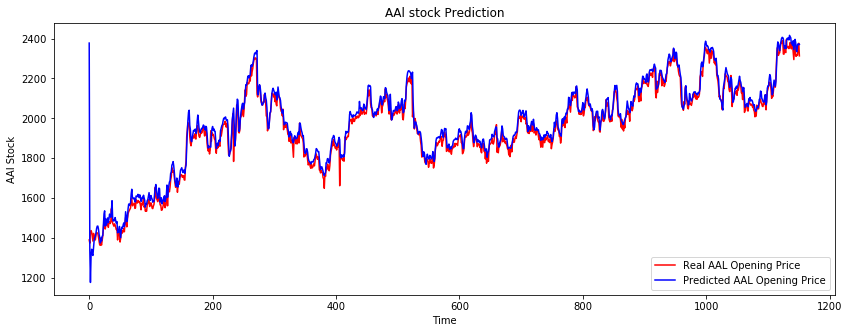

In [49]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real AAL Opening Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted AAL Opening Price')
plt.title('AAl stock Prediction')
plt.xlabel('Time')
plt.ylabel('AAl Stock')
plt.legend()
plt.show()

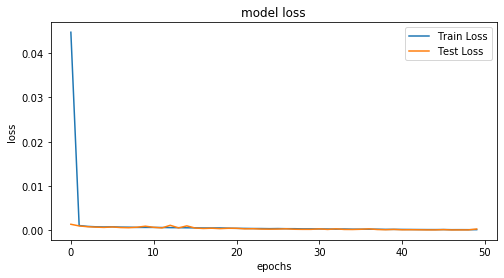

In [50]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [51]:
testScore = sqrt(mean_squared_error(y_pred,y_test))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 44.47 RMSE
